
### Problem statement
<span style="color:blue">


LearnX Sales Forecasting
LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.

Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on

Competition in the market for each course
Course Type (Course/Program/Degree)
Holiday Information for each day
User Traffic on Course Page for each day
Your task is to predict the course sales for each course in the test set for the next 60 days.



### Solution
#### 1. Descriptive analysis of Variables
<span style="color:blue">

##### 1.1. Data Summary
##### 1.2. Encoding categorical attributes
##### 1.3. Data Correlation
##### 1.4. Data cleansing
##### 1.5. Scatter plots

####  2. Model building -Xgboost

####  3. Statistical significance of predictor


#### Data Summary

In [1]:
import pandas as pd 
df = pd.read_csv("train.csv")
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [2]:
print(df.shape)


(512087, 11)


In [3]:
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


#### Encoding Categorical attributes


In [4]:
# Encoding the categorical attributes
df['Course_Domain']=df['Course_Domain'].astype('category')
df['Course_Domain']=df.Course_Domain.cat.codes

df['Course_Type']=df['Course_Type'].astype('category')
df['Course_Type']=df.Course_Type.cat.codes


In [5]:
df.head(5)


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,1,0,0,1,1,11004,0.007,81
1,2,2,1,1,0,0,0,1,13650,0.007,79
2,3,3,1,1,0,0,0,1,11655,0.007,75
3,4,4,1,1,0,0,0,1,12054,0.007,80
4,5,5,1,1,0,0,0,1,6804,0.007,41


In [6]:
# get the basic statistical details like  count, mean, std etc. of a data
df.describe()

/root/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,1.791162,0.970374,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.911838,0.997837,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10584.000000,NaN,84.000000
50%,273984.000000,427.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13776.000000,NaN,111.000000
75%,411065.500000,658.000000,451.000000,3.000000,2.000000,1.000000,0.000000,1.000000,18123.000000,NaN,146.000000
max,548027.000000,882.000000,600.000000,3.000000,2.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


Competition_Metric null entries are present

#### Correlation

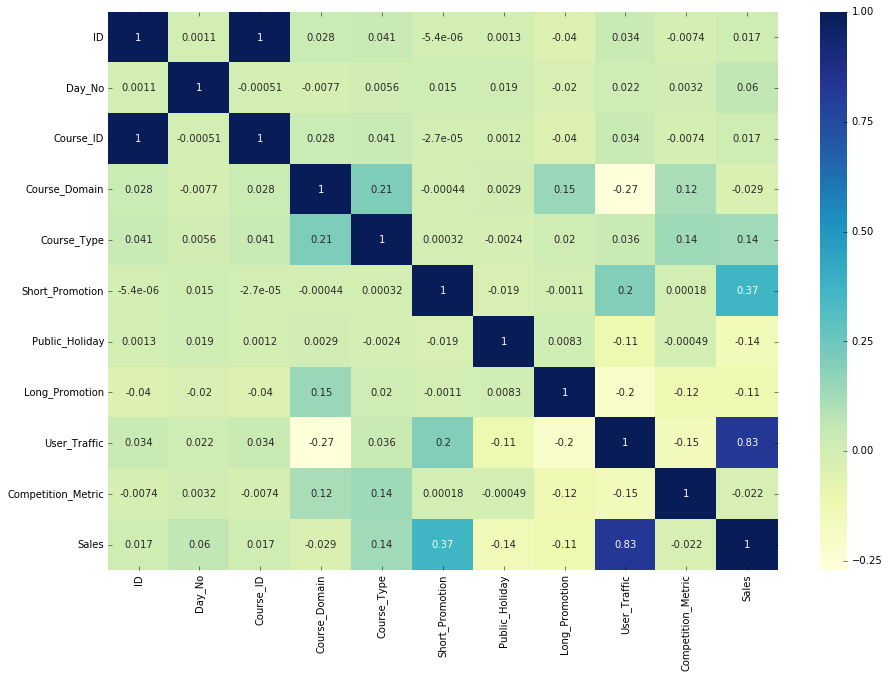

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#####  As it is visible from the pairplot and the heatmap that the attribute Short_Promotion  has moderate positive correlation (0.365) with target attribute i.e sales.

#####  The attribute User_Traffic has strong positive correlation (0.829) with target attribute i.e sales.



#### Cleansing


In [8]:
# Finding the null values.
print(df.isnull().sum())

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64


In [9]:
df1 = pd.read_csv("test.csv")
df1.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [10]:
# Finding the null values.
print(df1.isnull().sum())

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64


since train.csv and test.csv both file contains Competition_Metric as null; hence we remove it from both the files.
Moreover test.csv don't contain user traffic; hence we remove user_traffic from train.csv

In [11]:
df.drop('Competition_Metric',axis=1,inplace=True)
df.drop('User_Traffic',axis=1,inplace=True)

In [12]:
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Sales
0,1,1,1,1,0,0,1,1,81
1,2,2,1,1,0,0,0,1,79
2,3,3,1,1,0,0,0,1,75
3,4,4,1,1,0,0,0,1,80
4,5,5,1,1,0,0,0,1,41


In [13]:
df.describe()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,274007.300650,434.917869,300.388344,1.791162,0.970374,0.380244,0.031639,0.488968,120.826924
std,158228.834029,256.044161,173.365787,0.911838,0.997837,0.485447,0.175038,0.499879,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,84.000000
50%,273984.000000,427.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,111.000000
75%,411065.500000,658.000000,451.000000,3.000000,2.000000,1.000000,0.000000,1.000000,146.000000
max,548027.000000,882.000000,600.000000,3.000000,2.000000,1.000000,1.000000,1.000000,682.000000


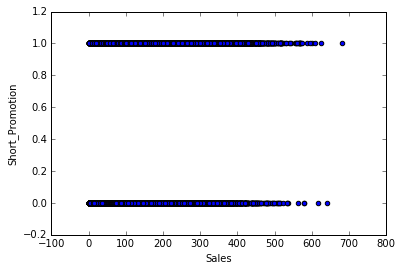

In [14]:
plt.scatter(df.Sales,df.Short_Promotion)
plt.xlabel('Sales')
plt.ylabel('Short_Promotion')


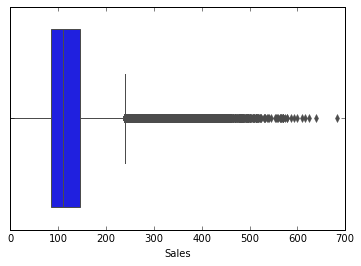

In [15]:
sns.boxplot(df['Sales'])
plt.show()


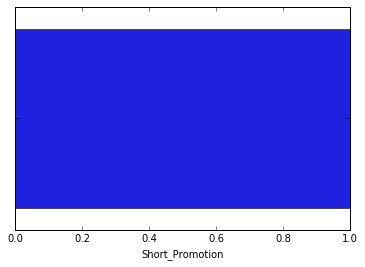

In [16]:
sns.boxplot(df['Short_Promotion'])
plt.show()


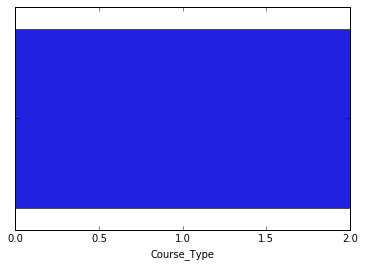

In [17]:
sns.boxplot(df['Course_Type'])
plt.show()


#### Model building using Xgboost
After descriptive analysis, I choose Xgboost for building sales forecasting model.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [19]:
X = df.iloc[:, 1:8].values
y = df.iloc[:, 8].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
params = {
    'booster': 'gbtree', 
    'objective': 'reg:linear',
    'subsample': 0.8, 
    'colsample_bytree': 0.85, 
    'eta': 0.01, 
    'max_depth': 16, 
    'seed': 42}

In [22]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [23]:
def rmsle(predictions,dmat):
	labels=dmat.get_label()
	diffs=np.log(predictions+1)-np.log(labels+1)
	squared_diffs=np.square(diffs)
	avg=np.mean(squared_diffs)
	return('RMSLE',np.sqrt(avg))

In [24]:
#xgb_model = xgb.train(params, dtrain, 1000, evals = watchlist,early_stopping_rounds = 50, feval=rmsle, verbose_eval = True)


In [25]:
xgb_model = xgb.train(params, dtrain, 1000, evals = watchlist,
                      early_stopping_rounds = 50, verbose_eval = True)

[16:21:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1920 extra nodes, 0 pruned nodes, max_depth=16
[0]	train-rmse:130.841	test-rmse:130.952
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
[16:21:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2012 extra nodes, 0 pruned nodes, max_depth=16
[1]	train-rmse:129.691	test-rmse:129.804
[16:21:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2168 extra nodes, 0 pruned nodes, max_depth=16
[2]	train-rmse:128.555	test-rmse:128.671
[16:21:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1844 extra nodes, 0 pruned nodes, max_depth=16
[3]	train-rmse:127.422	test-rmse:127.541
[16:21:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1342 extra nodes, 0 pruned nodes, max_depth=16
[4]	train-rmse:126.259	test-rmse:126.379
[16:21:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2296 extr

In [4]:

#Get the feature importance
#print(xgb_model.get_score(importance_type='gain'))


In [28]:
#validate the model performance

y_pred = xgb_model.predict( xgb.DMatrix(X_test))
predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

my_submission = pd.DataFrame({'y_test': y_test,'y_pred':y_pred, 'round-ypred': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('validate_check.csv', index=False)

In [27]:
# Test the model performance on test.csv. I removed the Competition_Metric from test.csv sinc the attribute is having null value and not significant predictor.
#CleanTestData2.csv is the test file without Competition_Metric attribute.	

df = pd.read_csv('CleanTestData2.csv')
test = df.iloc[:, 1:8].values

predicted_sell = xgb_model.predict(xgb.DMatrix(test))

round_predictions = [round(value) for value in predicted_sell]
my_submission = pd.DataFrame({'Id': df.ID, 'SalePrice': predicted_sell,'Sales': round_predictions })
my_submission.to_csv('final_submission.csv', index=False)

#### Statistical significance of predictor

In [1]:
import statsmodels.api as sm

In [9]:
import pandas as pd
df = pd.read_csv("train.csv",index_col=None) 
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [10]:
#X = df['Short_Promotion']
#y = df['Sales']
X = df['Short_Promotion']
y = df['Sales']


In [11]:
x=sm.add_constant(X)

In [12]:
results=sm.OLS(y,x).fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                 8.009e+04
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:10:39   Log-Likelihood:            -2.7355e+06
No. Observations:              512087   AIC:                         5.471e+06
Df Residuals:                  512085   BIC:                         5.471e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             105.1692      0.090   11

Looking at some key statistics from the summary

The values we are concerned with are -

1. The coefficient for  Short_Promotion is 41.1781 , with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.135
Meaning that 13.5% of the variance in Sales is explained by Short_Promotion


